# Import and view the dataset

In [2]:
import pandas as pd

# URL for the German Credit dataset (UCI repository)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

# Column names as per the dataset documentation
columns = [
    'checking_account', 'duration', 'history', 'purpose', 'credit_amount', 'savings_account', 'employment',
    'location', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
    'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker', 'class'
]

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url, sep=' ', header=None, names=columns, na_values='?')

# Display the first few rows to inspect the data
print("First 5 rows of the dataset:")
print(df.head())

# Separate the features (X) and target (y)
X = df.drop(columns='class')  # Features are all columns except 'class'
y = df['class']  # Target variable is 'class'

# Check for the target distribution
print("\nTarget Distribution:")
print(y.value_counts())

# Optionally, you can now inspect the first few rows of the features and target
print("\nFirst 5 rows of features (X):")
print(X.head())


First 5 rows of the dataset:
  checking_account  duration history purpose  credit_amount savings_account  \
0              A11         6     A34     A43           1169             A65   
1              A12        48     A32     A43           5951             A61   
2              A14        12     A34     A46           2096             A61   
3              A11        42     A32     A42           7882             A61   
4              A11        24     A33     A40           4870             A61   

  employment  location personal_status other_parties  ...  property_magnitude  \
0        A75         4             A93          A101  ...                A121   
1        A73         2             A92          A101  ...                A121   
2        A74         2             A93          A101  ...                A121   
3        A74         2             A93          A103  ...                A122   
4        A73         3             A93          A101  ...                A124   

  age  ot

# Inspect the distribution of Variables


Target Variable Distribution:
class
1    700
2    300
Name: count, dtype: int64


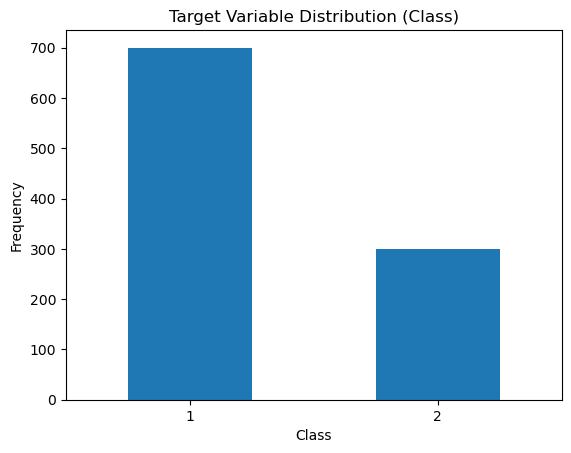

In [4]:
# Check the distribution of the target variable 'class'
print("\nTarget Variable Distribution:")
print(y.value_counts())

# Optionally, you can visualize the distribution with a bar plot
import matplotlib.pyplot as plt
y.value_counts().plot(kind='bar', title='Target Variable Distribution (Class)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()



Distribution for checking_account:
checking_account
A14    394
A11    274
A12    269
A13     63
Name: count, dtype: int64


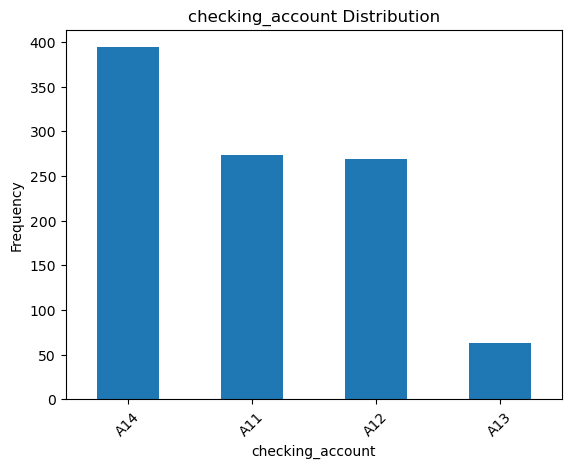


Distribution for history:
history
A32    530
A34    293
A33     88
A31     49
A30     40
Name: count, dtype: int64


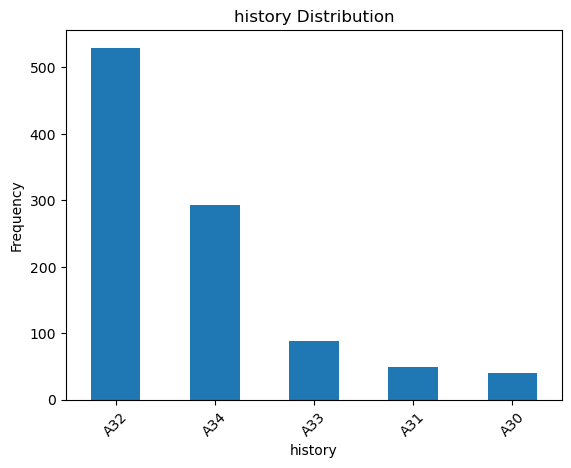


Distribution for purpose:
purpose
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: count, dtype: int64


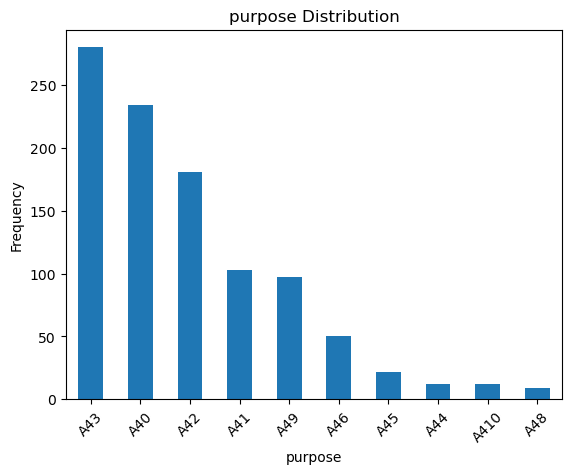


Distribution for savings_account:
savings_account
A61    603
A65    183
A62    103
A63     63
A64     48
Name: count, dtype: int64


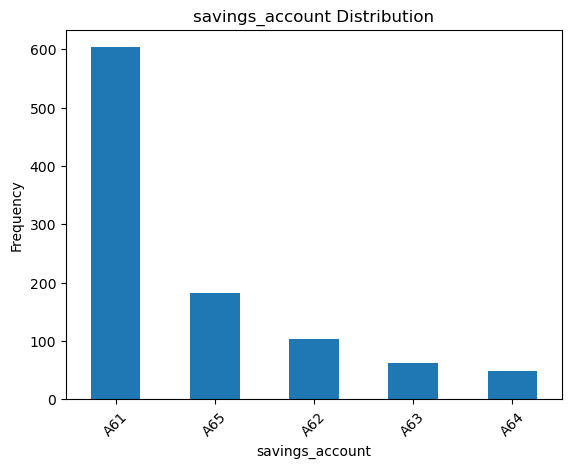


Distribution for employment:
employment
A73    339
A75    253
A74    174
A72    172
A71     62
Name: count, dtype: int64


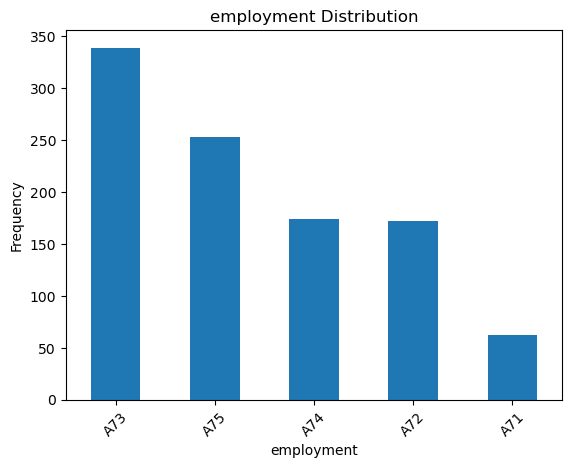


Distribution for personal_status:
personal_status
A93    548
A92    310
A94     92
A91     50
Name: count, dtype: int64


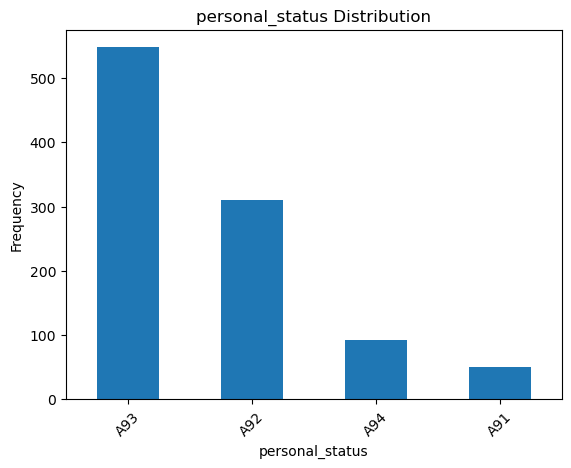


Distribution for other_parties:
other_parties
A101    907
A103     52
A102     41
Name: count, dtype: int64


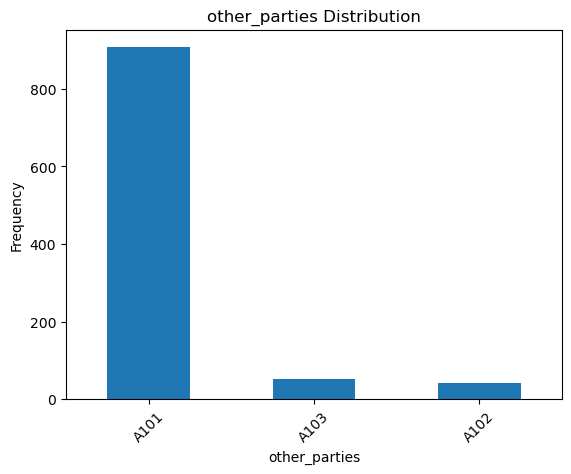


Distribution for property_magnitude:
property_magnitude
A123    332
A121    282
A122    232
A124    154
Name: count, dtype: int64


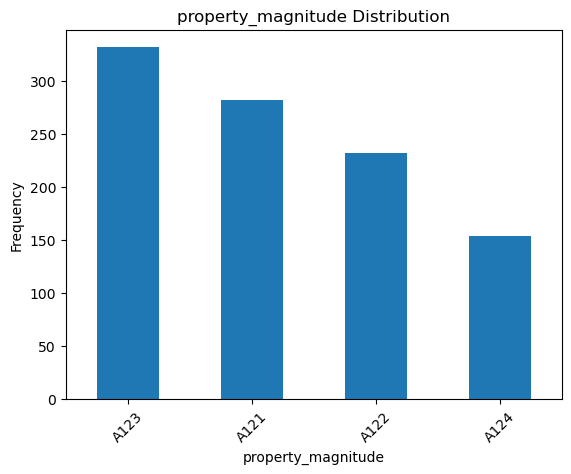


Distribution for other_payment_plans:
other_payment_plans
A143    814
A141    139
A142     47
Name: count, dtype: int64


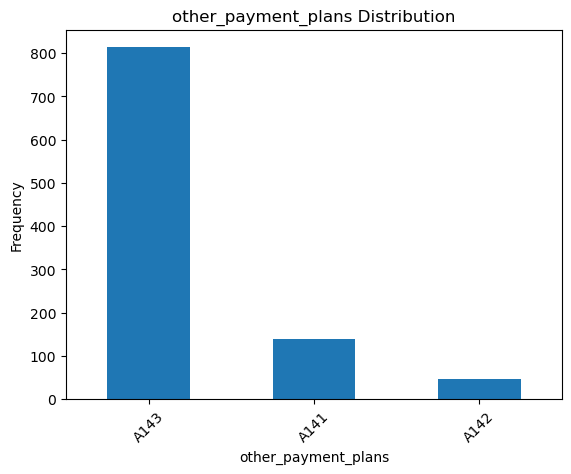


Distribution for housing:
housing
A152    713
A151    179
A153    108
Name: count, dtype: int64


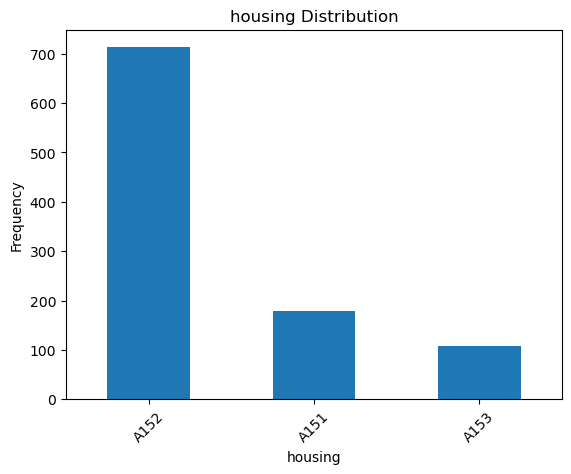


Distribution for job:
job
A173    630
A172    200
A174    148
A171     22
Name: count, dtype: int64


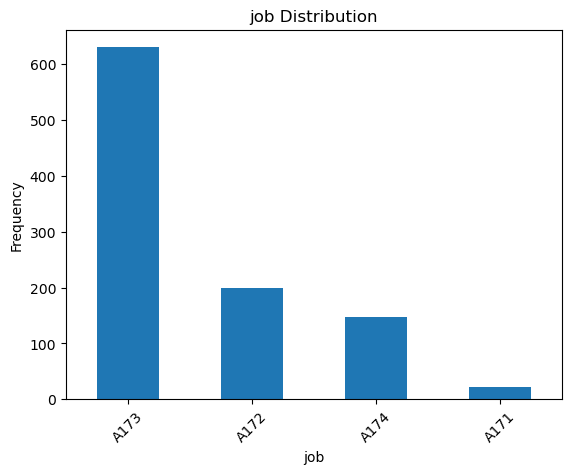


Distribution for own_telephone:
own_telephone
A191    596
A192    404
Name: count, dtype: int64


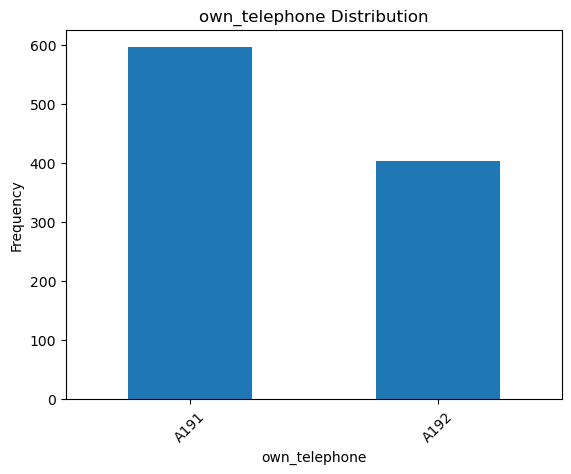


Distribution for foreign_worker:
foreign_worker
A201    963
A202     37
Name: count, dtype: int64


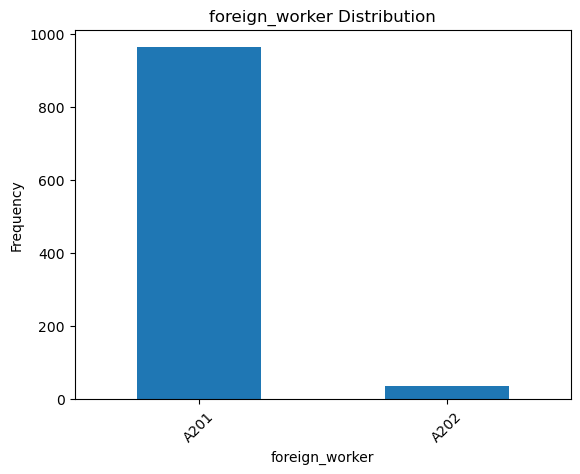

In [5]:
# Check the distribution of categorical features
categorical_columns = X.select_dtypes(include=['object']).columns

# Loop through each categorical column and print the distribution
for col in categorical_columns:
    print(f"\nDistribution for {col}:")
    print(X[col].value_counts())

    # Optionally, plot the distribution as a bar chart for each categorical variable
    X[col].value_counts().plot(kind='bar', title=f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()



Summary statistics for continuous features:
          duration  credit_amount     location  residence_since          age  \
count  1000.000000    1000.000000  1000.000000      1000.000000  1000.000000   
mean     20.903000    3271.258000     2.973000         2.845000    35.546000   
std      12.058814    2822.736876     1.118715         1.103718    11.375469   
min       4.000000     250.000000     1.000000         1.000000    19.000000   
25%      12.000000    1365.500000     2.000000         2.000000    27.000000   
50%      18.000000    2319.500000     3.000000         3.000000    33.000000   
75%      24.000000    3972.250000     4.000000         4.000000    42.000000   
max      72.000000   18424.000000     4.000000         4.000000    75.000000   

       existing_credits  num_dependents  
count       1000.000000     1000.000000  
mean           1.407000        1.155000  
std            0.577654        0.362086  
min            1.000000        1.000000  
25%            1.000000 

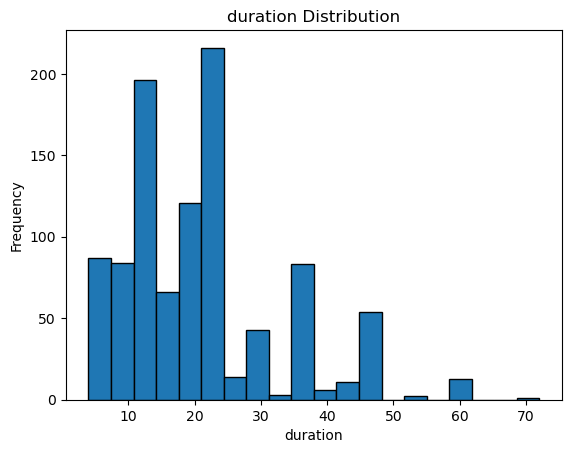

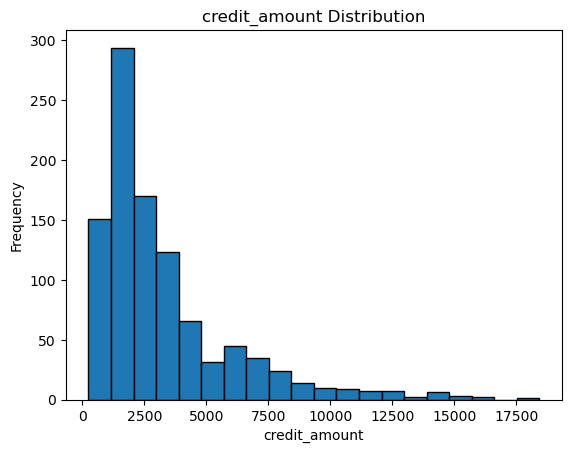

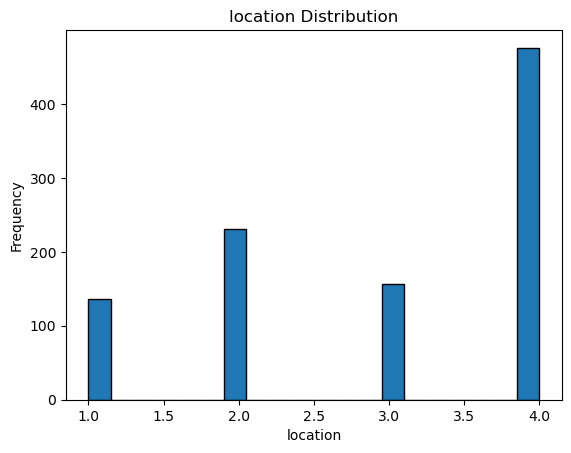

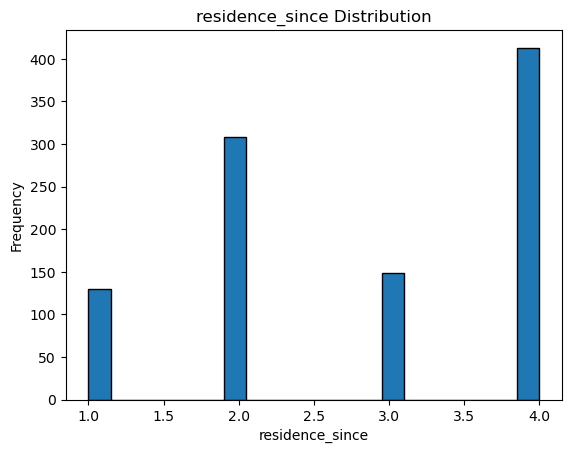

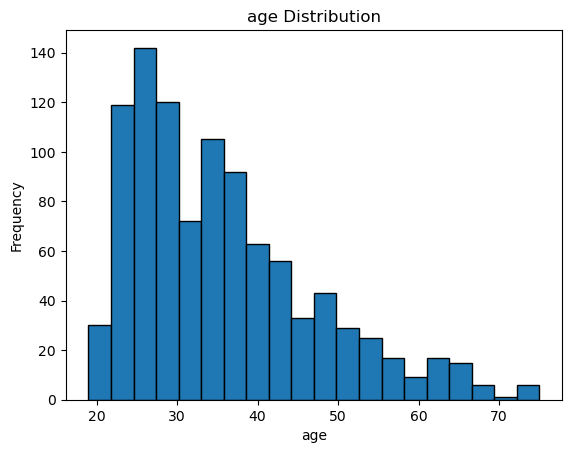

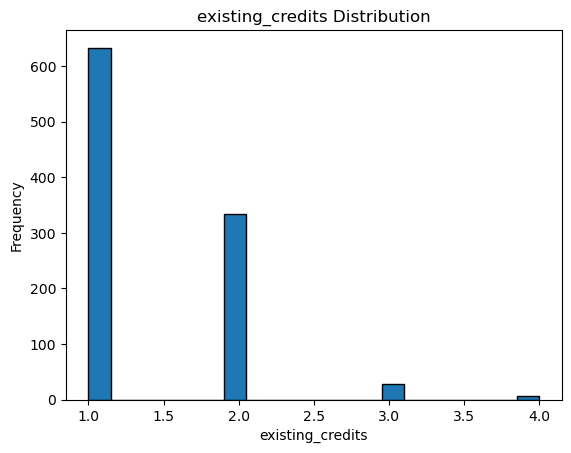

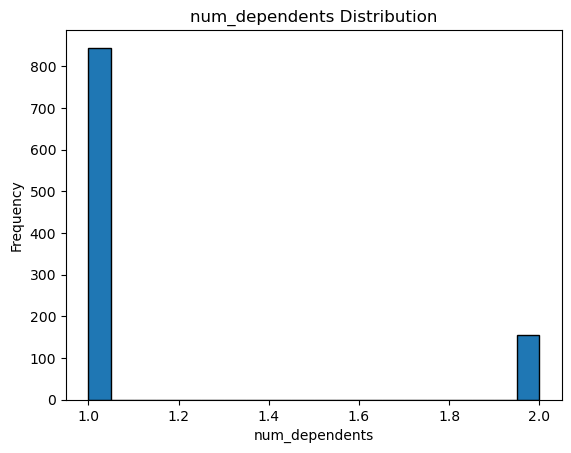

In [6]:
# Check the distribution of continuous features
continuous_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Display summary statistics for continuous features
print("\nSummary statistics for continuous features:")
print(X[continuous_columns].describe())

# Plot histograms for continuous features
for col in continuous_columns:
    X[col].plot(kind='hist', bins=20, title=f'{col} Distribution', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


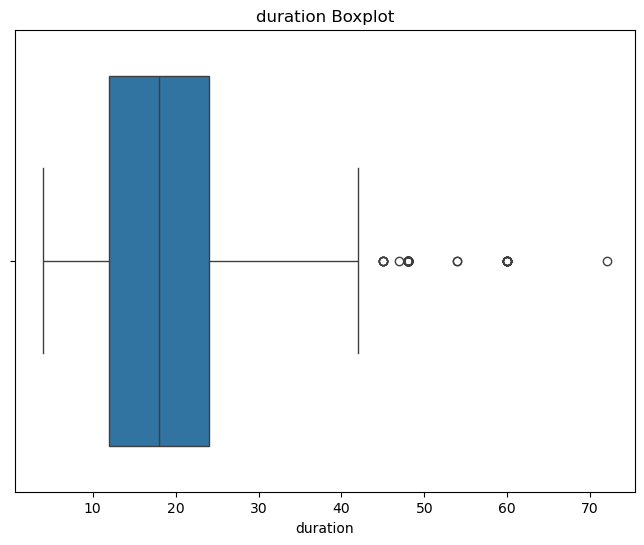

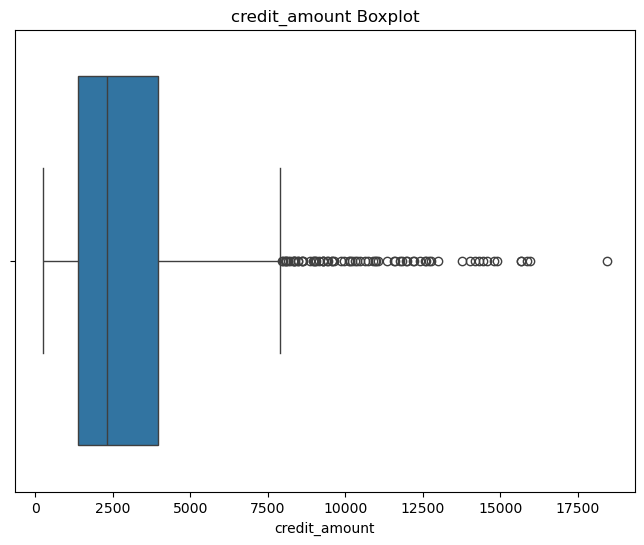

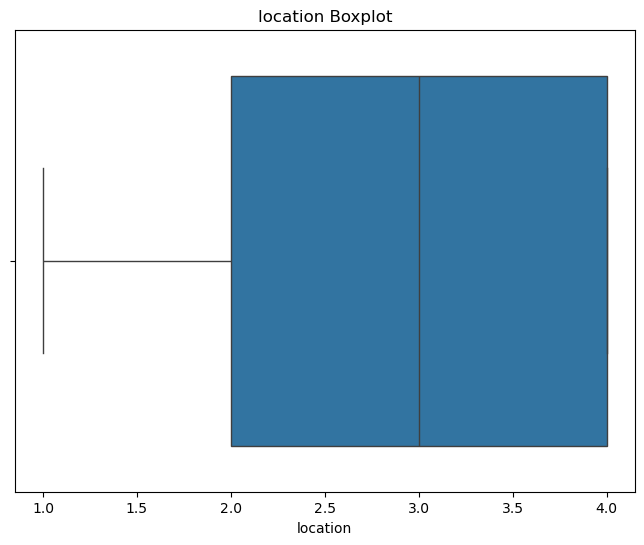

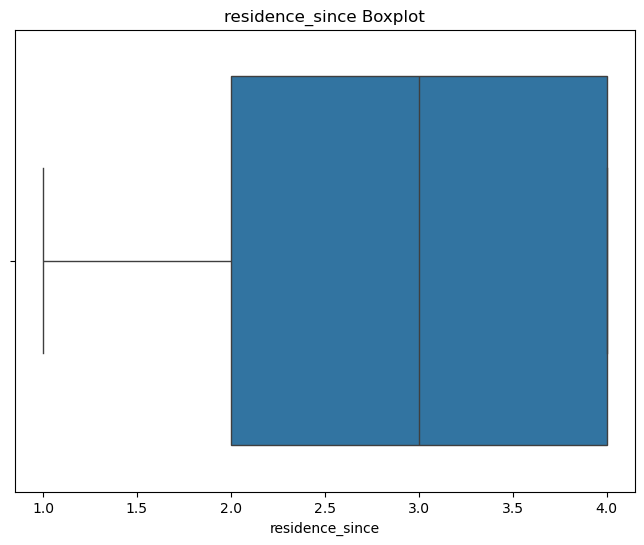

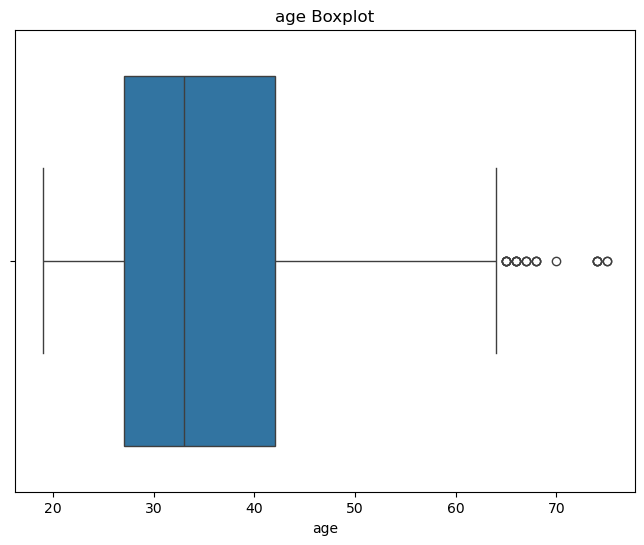

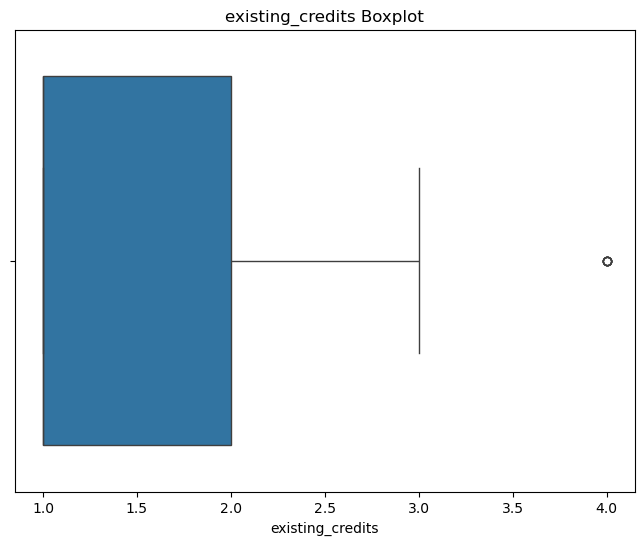

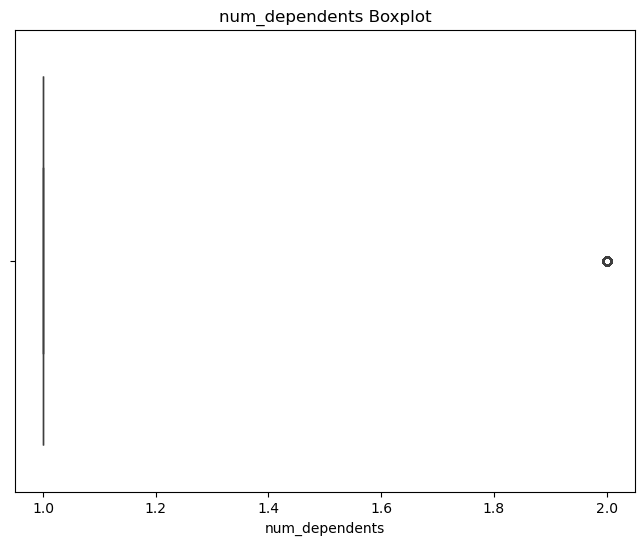

In [7]:
# Plot boxplots for continuous features to check for outliers
import seaborn as sns

for col in continuous_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=X[col])
    plt.title(f'{col} Boxplot')
    plt.show()


# How to use the Metadata?
How to Use the Metadata:
The metadata provides valuable insights that will guide the preprocessing and modeling steps:

Encoding Categorical Variables:

We’ll need to encode categorical variables (e.g., credit_history, purpose, housing) into numerical values.
For binary categorical variables (like telephone and foreign_worker),  use binary encoding (0/1).
For multiclass categorical variables (like status_of_existing_checking_account or credit_history),  use one-hot encoding.
Numerical Variables:

Scaling: Numerical features such as duration, credit_amount, and age will need to be scaled using a method like StandardScaler (to have a mean of 0 and standard deviation of 1).
Cost Matrix:

The cost matrix suggests that misclassifying a bad credit risk as good is more costly. This should be considered when tuning the model's parameters and during evaluation (e.g., using a weighted loss function or adjusting class weights).
Feature Types:

Based on the feature types (categorical and numerical), we can decide on the appropriate preprocessing steps:
Categorical: One-hot encoding, label encoding, or ordinal encoding.
Numerical: Scaling or normalization.


# Let's start Pre-Processing

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Assuming 'df' is the dataframe containing your data
# Split the dataset into features (X) and target (y)
X = df.drop(columns='class')  # Features (all columns except 'class')
y = df['class']  # Target (the 'class' column)

# 1. Identify numerical and categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
continuous_columns = X.select_dtypes(include=['int64', 'float64']).columns

# 2. Create a column transformer that applies the appropriate preprocessing steps:
#    - Standardize numerical features
#    - One-hot encode categorical features (without drop_first)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_columns),  # Scale numerical features
        ('cat', OneHotEncoder(sparse_output=False), categorical_columns)  # One-hot encode categorical features (without drop_first)
    ])

# 3. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Apply preprocessing to both training and testing data using the ColumnTransformer
# The ColumnTransformer will be applied as part of a pipeline.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit and transform the training data, and transform the test data
X_train_processed = pipeline.fit_transform(X_train)  # Fit and transform training data
X_test_processed = pipeline.transform(X_test)  # Transform test data (using the same scaler and encoder)

# Check the shapes of the processed data
print(f"Shape of X_train_processed: {X_train_processed.shape}")
print(f"Shape of X_test_processed: {X_test_processed.shape}")

# Optionally, you can check the first few rows of the processed data
print("\nFirst 5 rows of processed X_train:")
print(X_train_processed[:5, :])

# You can also extract the feature names after transformation
# Get column names of the transformed dataset
# Get column names for numerical and categorical features
categorical_column_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_columns)
all_column_names = continuous_columns.tolist() + categorical_column_names.tolist()

print("\nTransformed column names:")
print(all_column_names)


Shape of X_train_processed: (800, 61)
Shape of X_test_processed: (200, 61)

First 5 rows of processed X_train:
[[ 3.29708155  1.19991221  0.03119565  1.04450868  2.4061873   1.01777726
  -0.40973554  1.          0.          0.          0.          0.
   0.          0.          1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.          1.          0.          0.          0.
   0.          0.          0.          0.          0.          1.
   0.          0.          1.          0.          1.          0.
   0.          0.          0.          0.          1.          0.
   0.          1.          0.          1.          0.          0.
   0.          1.          0.          0.          1.          1.
   0.        ]
 [-0.00805096 -0.35962991 -0.86010854 -1.67144022 -0.22436411 -0.71093146
  -0.40973554  0.          0.          1.          0.          0.
   0.          0.          0.          1.          0.          0.


In [11]:
import numpy as np

# 1. Get the column names of the continuous features (after scaling, they will remain the same)
continuous_column_names = continuous_columns

# 2. Get the column names of the categorical features (after one-hot encoding)
# Instead of manually fitting the encoder, we can use the fitted pipeline to extract the feature names
categorical_column_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_columns)

# 3. Combine the column names from both the numerical and categorical features
all_column_names = np.concatenate([continuous_column_names, categorical_column_names])

# 4. Print the resulting column names of the transformed dataset
print("\nTransformed column names:")
print(all_column_names)



Transformed column names:
['duration' 'credit_amount' 'location' 'residence_since' 'age'
 'existing_credits' 'num_dependents' 'checking_account_A11'
 'checking_account_A12' 'checking_account_A13' 'checking_account_A14'
 'history_A30' 'history_A31' 'history_A32' 'history_A33' 'history_A34'
 'purpose_A40' 'purpose_A41' 'purpose_A410' 'purpose_A42' 'purpose_A43'
 'purpose_A44' 'purpose_A45' 'purpose_A46' 'purpose_A48' 'purpose_A49'
 'savings_account_A61' 'savings_account_A62' 'savings_account_A63'
 'savings_account_A64' 'savings_account_A65' 'employment_A71'
 'employment_A72' 'employment_A73' 'employment_A74' 'employment_A75'
 'personal_status_A91' 'personal_status_A92' 'personal_status_A93'
 'personal_status_A94' 'other_parties_A101' 'other_parties_A102'
 'other_parties_A103' 'property_magnitude_A121' 'property_magnitude_A122'
 'property_magnitude_A123' 'property_magnitude_A124'
 'other_payment_plans_A141' 'other_payment_plans_A142'
 'other_payment_plans_A143' 'housing_A151' 'housing_A1

# Step 1: Selecting the Models
For variety and to compare different approaches, let's start with these three popular models:

 Logistic Regression: A good baseline model for binary classification tasks.
 Random Forest Classifier: A powerful ensemble method that handles both categorical and numerical data well.
 Support Vector Machine (SVM): A solid choice for classification tasks, particularly for high-dimensional data.
 XGBoost (XGB) : Strong performance using gradient bossting.
# Step 2: Implementing Cross-Validation
We'll use k-fold cross-validation (with k=5 as a common choice) to evaluate the performance of each model. We'll also compare their performance across metrics like accuracy, precision, recall, and F1-score.

# Let's initialize all models

In [13]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np

# Adjust both y_train and y_test to have labels 0 and 1 (if they are currently 1 and 2)
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Create the models
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')

# 1. Logistic Regression Cross Validation
logreg_cv_scores = cross_val_score(logreg, X_train_processed, y_train_adjusted, cv=5, scoring='accuracy')
print(f"Logistic Regression - Mean CV accuracy: {logreg_cv_scores.mean():.4f}")

# 2. Random Forest Cross Validation
rf_cv_scores = cross_val_score(rf, X_train_processed, y_train_adjusted, cv=5, scoring='accuracy')
print(f"Random Forest - Mean CV accuracy: {rf_cv_scores.mean():.4f}")

# 3. Support Vector Machine Cross Validation
svm_cv_scores = cross_val_score(svm, X_train_processed, y_train_adjusted, cv=5, scoring='accuracy')
print(f"SVM - Mean CV accuracy: {svm_cv_scores.mean():.4f}")

# 4. XGBoost Cross Validation
xgb_cv_scores = cross_val_score(xgb_model, X_train_processed, y_train_adjusted, cv=5, scoring='accuracy')
print(f"XGBoost - Mean CV accuracy: {xgb_cv_scores.mean():.4f}")


Logistic Regression - Mean CV accuracy: 0.7450
Random Forest - Mean CV accuracy: 0.7525
SVM - Mean CV accuracy: 0.7450
XGBoost - Mean CV accuracy: 0.7300


# Random Forest (0.7525)
Best performer among the models in terms of cross-validation accuracy.
Random Forest is a robust ensemble method that performs well with a wide range of data types, especially when there are complex interactions between features.
The relatively high performance suggests that the model is able to capture important patterns in the data and may benefit from further tuning (e.g., adjusting the number of trees, max depth, or other hyperparameters).
# Logistic Regression (0.7450)
Very close to Random Forest in terms of accuracy.
Logistic Regression is a linear model, which means it's better suited for datasets where the decision boundary between classes is relatively simple.
Since the dataset seems to have a mix of numerical and categorical features, Logistic Regression does a good job, but may not capture complex relationships as well as Random Forest.
# Support Vector Machine (SVM) (0.7450)
The performance is identical to Logistic Regression, which suggests that the problem at hand might not involve highly non-linear decision boundaries that SVM typically excels at.
SVM works well in high-dimensional spaces and for datasets with a clear margin of separation, but in this case, it doesn't seem to outperform Random Forest or Logistic Regression.
SVM could be tuned by experimenting with kernel functions or regularization parameters to potentially improve performance, but based on this result, Random Forest appears to be more effective for this problem.
# XGBoost (0.7300)
Slightly lower performance compared to the other models.
XGBoost is a powerful gradient boosting algorithm that typically performs very well on tabular datasets. However, in this case, it seems to be slightly underperforming relative to the other models.
This could be due to various factors, including the need for hyperparameter tuning (e.g., learning rate, max depth, number of estimators), or perhaps the nature of the dataset might not benefit as much from boosting in comparison to Random Forest, which also leverages ensemble learning.
# Key Takeaways:
Random Forest seems to be the most suitable model for this dataset so far, as it provides the highest cross-validation accuracy. This suggests that the data may involve complex, non-linear relationships that Random Forest can capture effectively.
Logistic Regression and SVM perform similarly, indicating that the problem may not be well suited to the strengths of SVM, which thrives on more complex boundaries.
XGBoost could benefit from hyperparameter tuning to match or exceed the performance of Random Forest, but it is currently underperforming.

# Model Evaluation

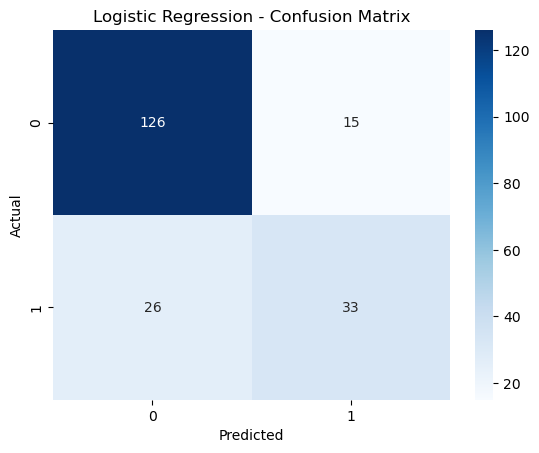

Logistic Regression - Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       141
           1       0.69      0.56      0.62        59

    accuracy                           0.80       200
   macro avg       0.76      0.73      0.74       200
weighted avg       0.79      0.80      0.79       200



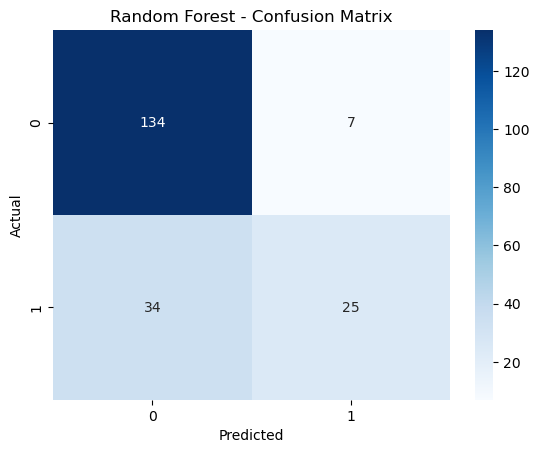

Random Forest - Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       141
           1       0.78      0.42      0.55        59

    accuracy                           0.80       200
   macro avg       0.79      0.69      0.71       200
weighted avg       0.79      0.80      0.77       200



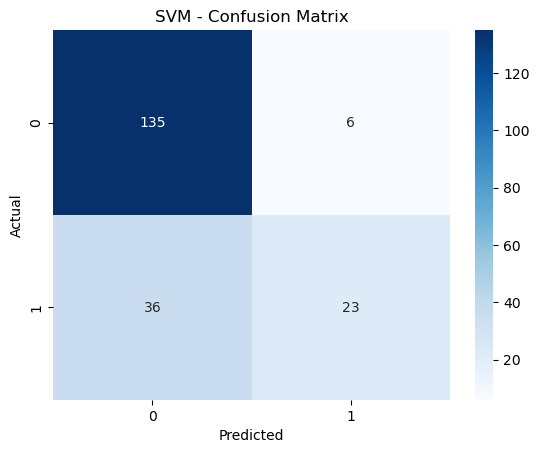

SVM - Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       141
           1       0.79      0.39      0.52        59

    accuracy                           0.79       200
   macro avg       0.79      0.67      0.69       200
weighted avg       0.79      0.79      0.76       200



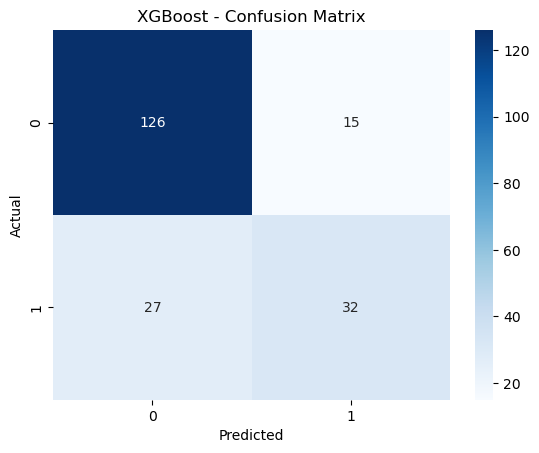

XGBoost - Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       141
           1       0.68      0.54      0.60        59

    accuracy                           0.79       200
   macro avg       0.75      0.72      0.73       200
weighted avg       0.78      0.79      0.78       200



In [16]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust y_train and y_test to map from [1, 2] to [0, 1]
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Define the models
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')

# Fit models
logreg.fit(X_train_processed, y_train_adjusted)
rf.fit(X_train_processed, y_train_adjusted)
svm.fit(X_train_processed, y_train_adjusted)
xgb_model.fit(X_train_processed, y_train_adjusted)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test_processed)
y_pred_rf = rf.predict(X_test_processed)
y_pred_svm = svm.predict(X_test_processed)
y_pred_xgb = xgb_model.predict(X_test_processed)

# Confusion Matrix and Classification Report
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"{model_name} - Classification Report:\n")
    print(classification_report(y_true, y_pred))

# Plot and print results for each model
models = [('Logistic Regression', y_pred_logreg), 
          ('Random Forest', y_pred_rf),
          ('SVM', y_pred_svm),
          ('XGBoost', y_pred_xgb)]

for model_name, y_pred in models:
    plot_confusion_matrix(y_test_adjusted, y_pred, model_name)


In [17]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Define SMOTE (oversampling the minority class)
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data (X_train_processed, y_train_adjusted)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train_adjusted)

# Check the new class distribution
print(f"Original dataset shape: {y_train_adjusted.value_counts()}")
print(f"Resampled dataset shape: {y_train_resampled.value_counts()}")


Original dataset shape: class
0    559
1    241
Name: count, dtype: int64
Resampled dataset shape: class
1    559
0    559
Name: count, dtype: int64


# Hyperparameter tuning
We'll start by tuning the hyperparameters for the following models:

Logistic Regression
Random Forest
XGBoost
We'll use the hyperopt library for Bayesian optimization, which provides a way to search for the optimal hyperparameters. 

# Random Forest Tuning

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]  # Handling class imbalance by balancing class weights
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to tune hyperparameters
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Output best parameters and cross-validation score
print(f"Best Random Forest parameters: {grid_search_rf.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_rf.best_score_}")


Best Random Forest parameters: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation accuracy: 0.8373518577834721


In [21]:
# Import necessary libraries
from sklearn.metrics import accuracy_score

# Use the best hyperparameters for Random Forest model
best_rf_model = RandomForestClassifier(
    n_estimators=300,  # Best number of trees
    max_depth=None,  # No limit on the tree depth
    min_samples_split=2,  # Default, split if there are at least 2 samples
    min_samples_leaf=1,  # Default, at least 1 sample per leaf
    class_weight=None,  # Default, no class weights applied
    random_state=42
)

# Fit the Random Forest model with the training data
best_rf_model.fit(X_train_processed, y_train_adjusted)

# Make predictions on the test set
y_pred_rf_test = best_rf_model.predict(X_test_processed)

# Calculate the accuracy score
accuracy_rf_test = accuracy_score(y_test_adjusted, y_pred_rf_test)

# Print the accuracy score
print(f"Accuracy on the test set (Random Forest): {accuracy_rf_test:.4f}")


Accuracy on the test set (Random Forest): 0.7900


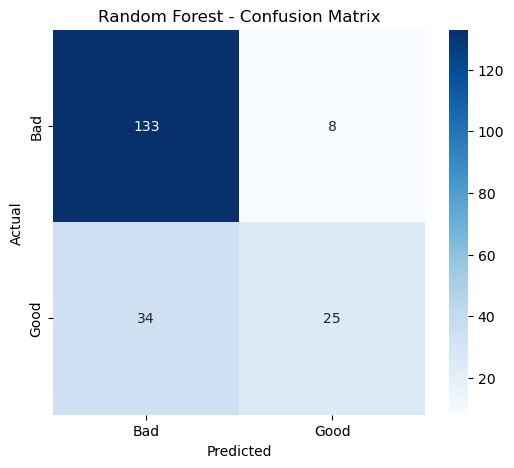

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       141
           1       0.76      0.42      0.54        59

    accuracy                           0.79       200
   macro avg       0.78      0.68      0.70       200
weighted avg       0.78      0.79      0.77       200



In [22]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test_adjusted, y_pred_rf_test)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test_adjusted, y_pred_rf_test))

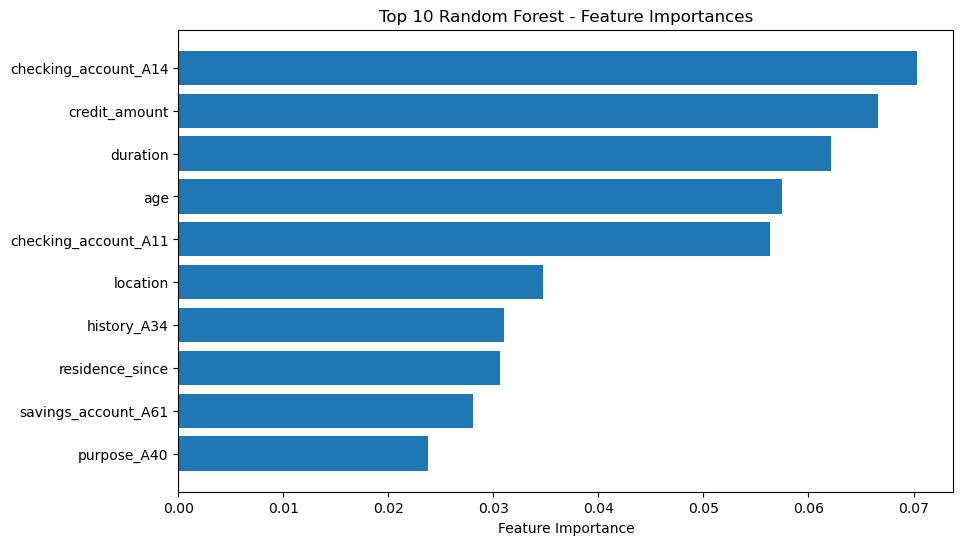

Top 10 Important Features for Random Forest:
1. checking_account_A14: 0.0703
2. credit_amount: 0.0666
3. duration: 0.0621
4. age: 0.0575
5. checking_account_A11: 0.0564
6. location: 0.0347
7. history_A34: 0.0310
8. residence_since: 0.0306
9. savings_account_A61: 0.0281
10. purpose_A40: 0.0238


In [23]:
# Get the feature importances from the fitted RandomForest model
from sklearn.model_selection import GridSearchCV
importances =  grid_search_rf.best_estimator_.feature_importances_     #if using a tuned model

# Get the column names after preprocessing
all_column_names = np.concatenate([continuous_column_names, categorical_column_names])

# Sort the importances in descending order and get the indices of the top 10 features
indices = np.argsort(importances)[::-1][:10]  # Get the top 10 features

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(range(10), importances[indices], align='center')
plt.yticks(range(10), all_column_names[indices])
plt.xlabel('Feature Importance')
plt.title('Top 10 Random Forest - Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


# Print the top 10 features and their importances for documentation
print("Top 10 Important Features for Random Forest:")
for i in range(10):
    print(f"{i + 1}. {all_column_names[indices[i]]}: {importances[indices[i]]:.4f}")

# XGBoost tuning

In [25]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# Set up GridSearchCV for XGBoost
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='accuracy',  # Use accuracy as the evaluation metric
                           cv=5,  # 5-fold cross-validation
                           verbose=2,  # Display progress
                           n_jobs=-1,  # Use all cores for parallel computation
                           return_train_score=True)  # Return training scores as well


In [26]:
# Fit GridSearchCV
#grid_search.fit(X_train_processed, y_train_adjusted)

grid_search.fit(X_train_resampled, y_train_resampled)
# Print the best parameters and best cross-validation score
print(f"Best XGBoost parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best XGBoost parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7}
Best cross-validation accuracy: 0.8257


Accuracy on the test set (Best XGBoost): 0.8000


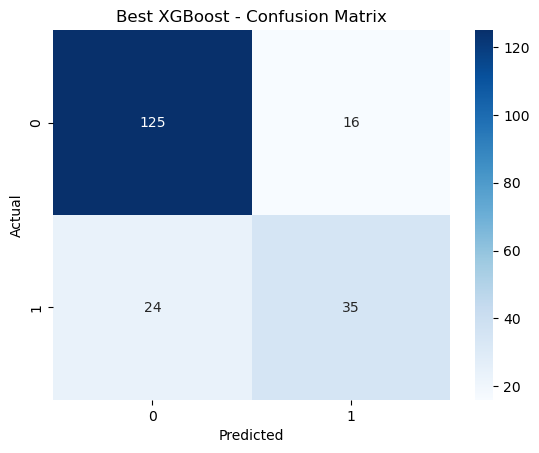

Best XGBoost - Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       141
           1       0.69      0.59      0.64        59

    accuracy                           0.80       200
   macro avg       0.76      0.74      0.75       200
weighted avg       0.79      0.80      0.80       200

Best XGBoost - Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       141
           1       0.69      0.59      0.64        59

    accuracy                           0.80       200
   macro avg       0.76      0.74      0.75       200
weighted avg       0.79      0.80      0.80       200



In [27]:
# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predict on the test set
y_pred_xgb_test = best_xgb_model.predict(X_test_processed)

# Evaluate accuracy on the test set
accuracy_xgb = accuracy_score(y_test_adjusted, y_pred_xgb_test)
print(f"Accuracy on the test set (Best XGBoost): {accuracy_xgb:.4f}")

# Confusion Matrix and Classification Report for Best XGBoost
plot_confusion_matrix(y_test_adjusted, y_pred_xgb_test, "Best XGBoost")

print(f"Best XGBoost - Classification Report:\n")
print(classification_report(y_test_adjusted, y_pred_xgb_test))


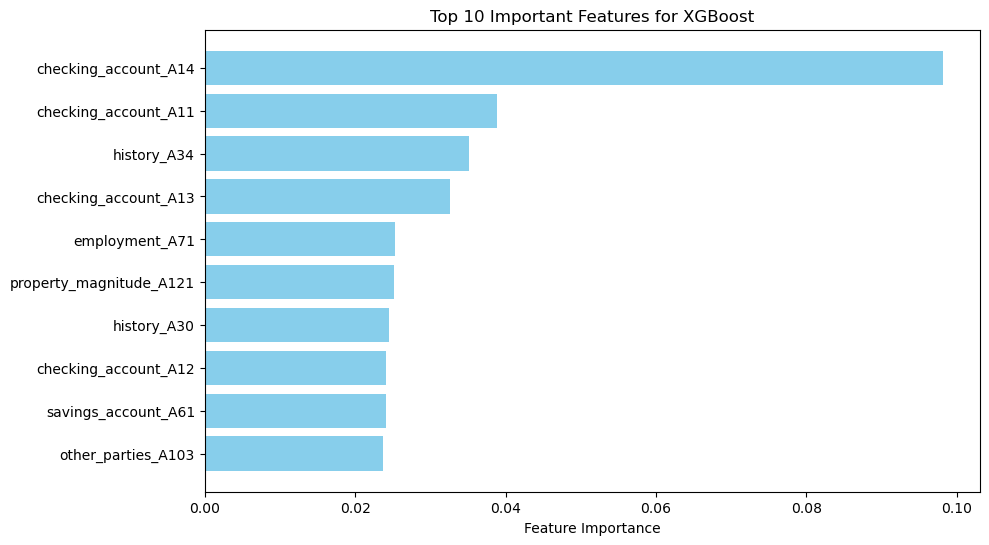

checking_account_A14: 0.0982
checking_account_A11: 0.0389
history_A34: 0.0351
checking_account_A13: 0.0327
employment_A71: 0.0253
property_magnitude_A121: 0.0251
history_A30: 0.0245
checking_account_A12: 0.0241
savings_account_A61: 0.0240
other_parties_A103: 0.0237


In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importances from the trained XGBoost model
importances = best_xgb_model.feature_importances_

# Get the column names after preprocessing
all_column_names = np.concatenate([continuous_column_names, categorical_column_names])

# Sort the features by importance (in descending order)
indices = np.argsort(importances)[::-1]

# Select top 10 important features
top_n = 10
top_indices = indices[:top_n]
top_features = all_column_names[top_indices]
top_importances = importances[top_indices]

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features for XGBoost')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

# Print the top 10 features and their importance scores
for feature, importance in zip(top_features, top_importances):
    print(f"{feature}: {importance:.4f}")


# LogisticRegression Tuning

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],              # Regularization strength
    'penalty': ['l2', 'l1'],                   # Regularization type
    'solver': ['liblinear', 'saga'],           # Optimization algorithm
    'max_iter': [100, 200, 300]                # Maximum number of iterations for convergence
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

#X_train_resampled, y_train_resampled
# Fit the model
#grid_search.fit(X_train_processed, y_train_adjusted)
grid_search.fit(X_train_resampled, y_train_resampled)
# Best parameters found by GridSearchCV
print("Best Logistic Regression parameters:", grid_search.best_params_)

# Best cross-validation accuracy
print("Best cross-validation accuracy:", grid_search.best_score_)

# Get the best model
best_logreg = grid_search.best_estimator_

# Predict on the test set
y_pred_logreg = best_logreg.predict(X_test_processed)

# Classification report
from sklearn.metrics import classification_report
print("\nBest Logistic Regression - Classification Report:\n")
print(classification_report(y_test_adjusted, y_pred_logreg))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Logistic Regression parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation accuracy: 0.7352818705957719

Best Logistic Regression - Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.76      0.81       141
           1       0.56      0.75      0.64        59

    accuracy                           0.76       200
   macro avg       0.72      0.75      0.73       200
weighted avg       0.78      0.76      0.76       200



C:\Users\Chirayu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Top 10 Important Features for Logistic Regression:
                 Feature  Coefficient
24           purpose_A48    -1.720340
23           purpose_A46     1.454569
53              job_A171    -1.280614
60   foreign_worker_A202    -1.234252
17           purpose_A41    -1.061990
15           history_A34    -1.036140
10  checking_account_A14    -1.021548
16           purpose_A40     0.921638
59   foreign_worker_A201     0.892524
11           history_A30     0.861304


C:\Users\Chirayu\AppData\Local\Temp\ipykernel_5152\290137519.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_10_features, palette='viridis')


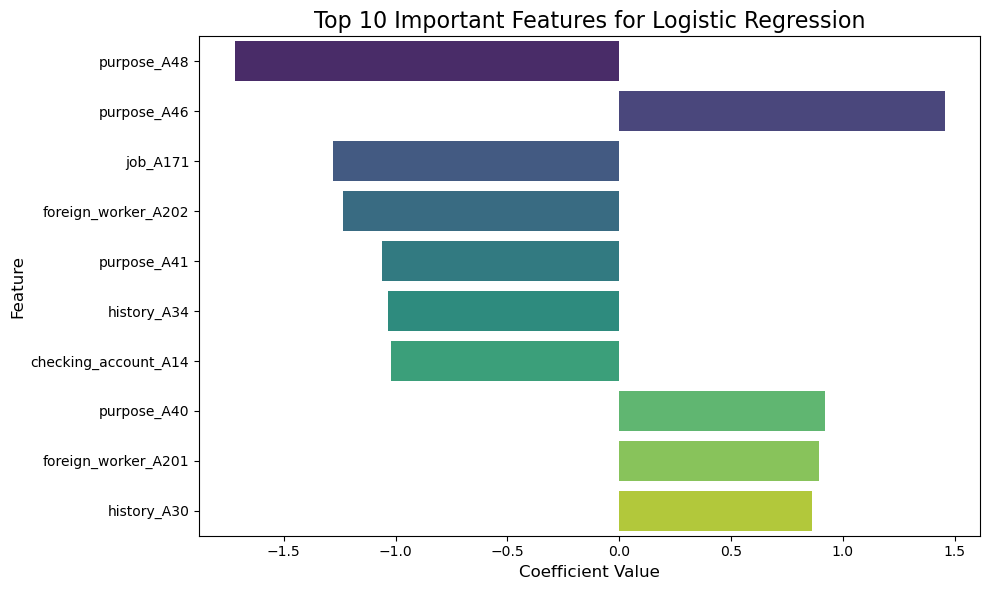

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the coefficients of the trained Logistic Regression model from the best estimator
coefficients = grid_search.best_estimator_.coef_[0]

# Get the feature names after preprocessing
all_column_names = np.concatenate([continuous_column_names, categorical_column_names])

# Create a DataFrame with features and their corresponding coefficients
feature_importance_df = pd.DataFrame({
    'Feature': all_column_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of the coefficient
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Get the top 10 features
top_10_features = feature_importance_df.head(10)

# Print the top 10 features with their coefficients
print("Top 10 Important Features for Logistic Regression:")
print(top_10_features[['Feature', 'Coefficient']])

# Visualization: Bar plot for the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_10_features, palette='viridis')

# Add labels and title
plt.title("Top 10 Important Features for Logistic Regression", fontsize=16)
plt.xlabel("Coefficient Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


# Lets Apply and test our Best Models


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# URL for the German Credit dataset (UCI repository)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

# Column names as per the dataset documentation
columns = [
    'checking_account', 'duration', 'history', 'purpose', 'credit_amount', 'savings_account', 'employment',
    'location', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
    'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker', 'class'
]

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url, sep=' ', header=None, names=columns, na_values='?')

# Separate the features (X) and target (y)
X = df.drop(columns='class')  # Features are all columns except 'class'
y = df['class']  # Target variable is 'class'

# Adjust the target variable to be 0 and 1 (instead of 1 and 2)
y = y - 1  # Adjusting target labels to [0, 1]

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scaling numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # One-Hot Encoding for categorical features
    ]
)

# Apply preprocessing (fit on training data and transform test data)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 1. Best Random Forest Model (from earlier hyperparameter tuning)
rf_best = RandomForestClassifier(
    n_estimators=300, max_depth=None, min_samples_split=2, 
    min_samples_leaf=1, class_weight='balanced', random_state=42
)

# Use 5-fold cross-validation to evaluate Random Forest
cv_rf = cross_val_score(rf_best, X_train_processed, y_train, cv=5, scoring='accuracy')
print(f"Random Forest - Cross-Validation Accuracy: {cv_rf.mean():.4f} (+/- {cv_rf.std():.4f})")

# Fit the model on the full training set after cross-validation
rf_best.fit(X_train_processed, y_train)
y_pred_rf = rf_best.predict(X_test_processed)
print(f"Random Forest - Test Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

# 2. Best XGBoost Model (updated hyperparameters)
xgb_best = xgb.XGBClassifier(
    colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=3, 
    n_estimators=200, subsample=0.7, eval_metric='mlogloss', random_state=42
)

# Use 5-fold cross-validation to evaluate XGBoost
cv_xgb = cross_val_score(xgb_best, X_train_processed, y_train, cv=5, scoring='accuracy')
print(f"XGBoost - Cross-Validation Accuracy: {cv_xgb.mean():.4f} (+/- {cv_xgb.std():.4f})")

# Fit the model on the full training set after cross-validation
xgb_best.fit(X_train_processed, y_train)
y_pred_xgb = xgb_best.predict(X_test_processed)
print(f"XGBoost - Test Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("XGBoost - Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# 3. Best Logistic Regression Model (from earlier hyperparameter tuning)
logreg_best = LogisticRegression(
    C=100, max_iter=100, penalty='l1', solver='saga', random_state=42
)

# Use 5-fold cross-validation to evaluate Logistic Regression
cv_logreg = cross_val_score(logreg_best, X_train_processed, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression - Cross-Validation Accuracy: {cv_logreg.mean():.4f} (+/- {cv_logreg.std():.4f})")

# Fit the model on the full training set after cross-validation
logreg_best.fit(X_train_processed, y_train)
y_pred_logreg = logreg_best.predict(X_test_processed)
print(f"Logistic Regression - Test Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Random Forest - Cross-Validation Accuracy: 0.7525 (+/- 0.0188)
Random Forest - Test Accuracy: 0.7450
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       141
           1       0.65      0.29      0.40        59

    accuracy                           0.74       200
   macro avg       0.71      0.61      0.62       200
weighted avg       0.73      0.74      0.71       200

XGBoost - Cross-Validation Accuracy: 0.7413 (+/- 0.0166)
XGBoost - Test Accuracy: 0.7800
XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       141
           1       0.66      0.53      0.58        59

    accuracy                           0.78       200
   macro avg       0.74      0.71      0.72       200
weighted avg       0.77      0.78      0.77       200



C:\Users\Chirayu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Chirayu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Chirayu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Chirayu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Chirayu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression - Cross-Validation Accuracy: 0.7375 (+/- 0.0385)
Logistic Regression - Test Accuracy: 0.7950
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       141
           1       0.67      0.59      0.63        59

    accuracy                           0.80       200
   macro avg       0.76      0.74      0.74       200
weighted avg       0.79      0.80      0.79       200



C:\Users\Chirayu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Ensemble Trees Test

Ensemble Voting Classifier Accuracy: 75.00%
Confusion Matrix:
[[133   8]
 [ 42  17]]


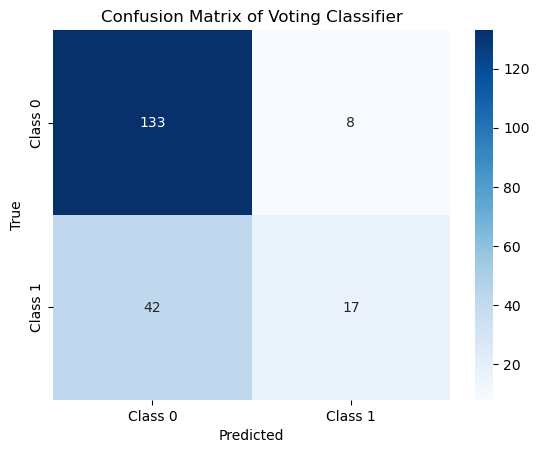

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Combine the classifiers into a voting classifier (Majority Voting)
voting_clf = VotingClassifier(estimators=[
    ('dt', dt_classifier),
    ('rf', rf_classifier)
], voting='hard')  # 'hard' means majority voting

# Train the Voting Classifier on the processed training data
voting_clf.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred = voting_clf.predict(X_test_processed)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Voting Classifier Accuracy: {accuracy * 100:.2f}%")

# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix of Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Improved Logistic Regression Accuracy: 81.00%
Confusion Matrix:
[[127  14]
 [ 24  35]]


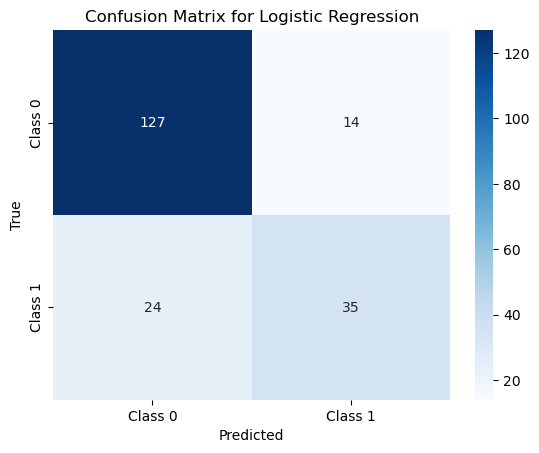

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scaling numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # One-Hot Encoding for categorical features
    ]
)

# Create a Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear', random_state=42)

# Create a full pipeline with preprocessing and logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg_model)
])

# Set the hyperparameters for tuning
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength for logistic regression
    'classifier__penalty': ['l1', 'l2'],  # L1 (Lasso) or L2 (Ridge) regularization
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model after tuning
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Logistic Regression Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix for the tuned model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Precision, Recall, F1-Score for both classes
precision_class_1 = precision_score(y_test, y_pred)
recall_class_1 = recall_score(y_test, y_pred)
f1_class_1 = f1_score(y_test, y_pred)

precision_class_0 = precision_score(y_test, y_pred, pos_label=0)
recall_class_0 = recall_score(y_test, y_pred, pos_label=0)
f1_class_0 = f1_score(y_test, y_pred, pos_label=0)

# ROC AUC
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f"Class 1 (Default) - Precision: {precision_class_1:.2f}, Recall: {recall_class_1:.2f}, F1-Score: {f1_class_1:.2f}")
print(f"Class 0 (No Default) - Precision: {precision_class_0:.2f}, Recall: {recall_class_0:.2f}, F1-Score: {f1_class_0:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


Class 1 (Default) - Precision: 0.71, Recall: 0.59, F1-Score: 0.65
Class 0 (No Default) - Precision: 0.84, Recall: 0.90, F1-Score: 0.87
ROC AUC: 0.82


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Regularization type (l1 or l2)
    'solver': ['liblinear'],  # Solver choice ('liblinear' for small datasets)
    'class_weight': ['balanced', None]  # Class weight options to handle imbalanced classes
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_processed, y_train)

# Best parameters after tuning
print(f"Best Hyperparameters: {grid_search.best_params_}")


Best Hyperparameters: {'C': 10, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}


In [39]:
# Get the best model from GridSearchCV
#best_logreg_model = grid_search.best_estimator_

best_logreg_model = LogisticRegression(
    C=100, max_iter=100, penalty='l1', solver='saga', random_state=42
)
cv_logreg = cross_val_score(logreg_best, X_train_processed, y_train, cv=5, scoring='accuracy')

best_logreg_model.fit(X_train_processed, y_train)
# Evaluate the best model on the test set
y_pred_test = best_logreg_model.predict(X_test_processed)

# Print classification report
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


C:\Users\Chirayu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Chirayu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Chirayu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Chirayu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Chirayu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       141
           1       0.67      0.59      0.63        59

    accuracy                           0.80       200
   macro avg       0.76      0.74      0.74       200
weighted avg       0.79      0.80      0.79       200

Confusion Matrix:
 [[124  17]
 [ 24  35]]


C:\Users\Chirayu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [40]:
# Get predicted probabilities for the positive class (Class 1: Default)
y_prob = best_logreg_model.predict_proba(X_test_processed)[:, 1]  # Probability of class 1 (Default)

# Set a lower threshold (e.g., 0.4 instead of 0.5) to classify as Default (Class 1)
threshold = 0.4
y_pred_adjusted = (y_prob > threshold).astype(int)

# Evaluate the impact of the adjusted threshold
from sklearn.metrics import classification_report, confusion_matrix

# Print the classification report and confusion matrix
print(f"Classification Report with Threshold {threshold}:\n", classification_report(y_test, y_pred_adjusted))
print(f"Confusion Matrix with Threshold {threshold}:\n", confusion_matrix(y_test, y_pred_adjusted))


Classification Report with Threshold 0.4:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85       141
           1       0.63      0.71      0.67        59

    accuracy                           0.79       200
   macro avg       0.75      0.77      0.76       200
weighted avg       0.80      0.79      0.79       200

Confusion Matrix with Threshold 0.4:
 [[116  25]
 [ 17  42]]


############################################################################################################

In [42]:
model_card_text = """
# Logistic Regression Model Card

## Model Overview
- **Model Type**: Logistic Regression (LogReg)
- **Objective**: Predict whether an individual will default on a loan. The target variable is binary, where:
  - **Class 0**: No Default
  - **Class 1**: Default
- **Training Data**: The model was trained on the **German Credit Dataset** from the UCI Machine Learning Repository.
- **Features**:
  - **Numerical Features**: Age, Duration of credit, Credit amount, Number of existing credits, etc.
  - **Categorical Features**: Checking account status, Employment type, Housing situation, etc.
  - **All features**: 'checking_account', 'duration', 'history', 'purpose', 'credit_amount', 'savings_account', 'employment',
    'location', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
    'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker'
- **Target Variable**:  'class' Binary classification of whether a person defaults (1) or not (0).


## Final Model Parameters
The final model was tuned using **GridSearchCV** to find the best hyperparameters. The best combination found during the grid search was:

- **C (Regularization strength)**: 100 (A higher value of C means less regularization, allowing the model to fit the training data more closely)
- **Penalty**: 'l1' ('L1' regularization encourages sparsity, meaning it can drive some coefficients to zero, which can lead to a simpler model with fewer features.)
- **Solver**: 'saga' ('SAGA' is suitable for large datasets and can handle L1 regularization effectively.)
- **Max_iter**: 100 (Maximum number of iterations for the solver)

## Model Performance

### Evaluation Metrics (Test Set)
After applying a threshold of 0.4, the model's performance metrics were as follows:

- **Accuracy**: 79.00% (With adjusted threshold)
- **Precision**:
  - **Class 0 (No Default)**: 0.87
  - **Class 1 (Default)**: 0.63
- **Recall**:
  - **Class 0 (No Default)**: 0.82
  - **Class 1 (Default)**: 0.71
- **F1-Score**:
  - **Class 0 (No Default)**: 0.85
  - **Class 1 (Default)**: 0.67
- **ROC AUC**: 0.82

### Confusion Matrix (Threshold: 0.4)
[[116 25] [ 17 42]]


### Threshold Adjustment:
- **Decision Threshold**: 0.4 (Lowered from the default of 0.5 to increase recall for the Default class)
- The threshold adjustment was made to prioritize the detection of more **default cases (Class 1)**, which is often more critical in risk assessment scenarios like credit scoring. However, this change comes at the cost of reduced precision for Class 1 (Default), as we are now classifying more instances as Default.

## Intended Use
This model is designed for **credit risk assessment**, specifically to predict the likelihood of a customer defaulting on a loan. By using this model, banks or financial institutions can assess the risk level of granting loans to customers and take appropriate actions such as setting credit limits, offering tailored loan terms, or declining loan applications based on predicted risk.

### Important Considerations:
- **Imbalanced Data**: The dataset has an imbalance in the classes, with more non-defaults (Class 0) than defaults (Class 1). This imbalance may affect the model's performance, particularly with precision and recall for Class 1 (Default).
- **Threshold Tuning**: As observed, adjusting the decision threshold has a direct impact on the precision and recall balance. A threshold of 0.4 prioritizes recall for Class 1, reducing false negatives but increasing false positives.
- **Model Interpretability**: Logistic Regression is interpretable, meaning it can provide insights into which features contribute the most to predicting defaults, making it easier to explain decisions to stakeholders.

## Limitations
- **Bias in the Data**: The performance of the model is heavily reliant on the quality and representativeness of the data. If the training data is biased or not representative of the real-world distribution of credit applicants, the model may fail to generalize well.
- **Imbalanced Data**: As mentioned earlier, the class imbalance could impact the model's ability to accurately predict the minority class (defaults).
- **Interpretability**: While Logistic Regression is interpretable, its simplicity may limit its ability to capture more complex patterns present in the data. Alternative models like Random Forest or XGBoost might perform better in such cases.

## Future Work
- **Model Enhancement**: 
  - Explore alternative models such as **Random Forest**, **XGBoost**, or **Gradient Boosting** to see if they can capture more complex patterns in the data.
  - Experiment with ensemble methods, such as combining Logistic Regression with Random Forest or boosting models to improve overall performance.
- **Feature Engineering**: 
  - Create additional features (e.g., interaction terms) to enhance model performance.
  - Evaluate the impact of adding new features or reducing features through feature selection.
- **Cross-validation**: Use **cross-validation** to validate model performance and ensure robustness against overfitting.

## Recommendations
- **Threshold Selection**: In situations where the goal is to minimize the number of defaults overlooked (false negatives), adjusting the threshold to 0.4 can be beneficial, as it increases recall for Class 1 (Default). However, it's important to balance this with the precision of Class 0 (No Default), as a lower threshold increases false positives.
- **Consider Rebalancing**: Since the dataset is imbalanced, you may want to try resampling techniques (e.g., SMOTE) or use model-based approaches like **balanced class weights** to address the imbalance and improve the model's performance on the minority class.
- **Regular Monitoring and Updates**: The model should be regularly monitored and updated with new data to ensure it stays relevant and accurate over time. It's also important to retrain the model periodically with fresh data to avoid drift.

## Model Deployment
The final model can be deployed into a production environment for real-time credit scoring. However, it is essential to continuously evaluate its performance and update it with new data to ensure it maintains its predictive accuracy.

### Deployment Considerations:
- **Real-Time Inference**: The model can be used in a web service that takes new customer information as input and returns the predicted likelihood of default.
- **Model Drift**: Over time, the distribution of the features in the incoming data may change. Continuous monitoring of the model's performance is essential to detect any drift in predictions.

## Authors
- **Developed by**: [Chirayu_Kushalkar]
- **Date**: [20th November 2024]
"""

# Save the model card to a markdown file
with open("logreg_model_card_full.md", "w") as file:
    file.write(model_card_text)

print("Complete model card saved as logreg_model_card_full.md")


Complete model card saved as logreg_model_card_full.md


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import numpy as np
import pandas as pd

# Assuming we already have the threshold adjusted predictions
# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_adjusted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.title(f"Confusion Matrix (Threshold = {threshold})")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("confusion_matrix_adjusted_threshold.png")
plt.close()

# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig("roc_curve_adjusted_threshold.png")
plt.close()

# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.savefig("precision_recall_curve_adjusted_threshold.png")
plt.close()



print("Visualizations saved as PNG files")


Visualizations saved as PNG files


# LogReg performed better than RandomForest. Lets see why...

# Explainability and Implementation

As a Data Analyst, working in a Private Sector Bank in India, I also have my own real-life observations which should be mentioned
here.

Before a ML model is implemented, the Business Teams and top stakeholders of the product ask for the model's justification for approving/rejecting a loan. So far, Logistic Regression Models have vastly been preferred due to their easy implementation, less computational costs and perfect explainiability.

It also becomes easier for banks to report the same to the Banking Industry Regulator (Reserve Bank of India in my case).